In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import skew
from scipy.stats import kurtosistest 
from scipy import stats 
import statsmodels.api as sm

In [62]:
df = pd.read_csv("estandarizados.csv", index_col = 0)

In [63]:
df.head(16)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,4,0,1,1,1,0,2,-0.778781,-0.632082,1.232734,-0.391485,-0.771840,654,-1.802458
1,2,4,0,1,0,2,1,2,-0.674240,-0.691755,0.469324,0.731665,-1.155857,670,-1.901181
2,3,4,0,1,0,3,1,1,-1.580704,-1.692801,-1.331685,0.729762,-1.176978,1229,-1.607158
3,4,4,0,1,0,4,1,1,-1.560855,-1.553969,-0.266251,-0.393388,-1.200019,1454,-1.492876
4,5,4,0,1,0,5,1,1,-1.413968,-1.450455,-1.333773,-0.054540,-1.249941,1518,-1.472487
5,6,4,0,1,0,6,0,1,-1.537035,-1.426099,-0.768000,-1.295716,-1.238420,1518,-1.469268
6,7,4,0,1,0,7,0,2,-1.579381,-1.574672,-0.904398,-0.286784,-1.123215,1362,-1.520776
7,8,4,0,1,0,1,1,2,-1.751411,-1.858424,-0.646216,0.965814,-1.276822,891,-1.816408
8,9,4,0,1,0,2,1,1,-1.895651,-2.138521,-1.353258,2.178435,-1.303703,768,-1.889914
9,10,4,0,1,0,3,1,1,-1.828163,-1.927839,-1.014351,0.409950,-1.328664,1280,-1.622181


In [64]:
df["season"].unique()

array([4, 1, 2, 3])

In [65]:
df["weekday"].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [66]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,686.000000,686.000000,686.000000,686.00000,686.000000,686.000000,686.000000,686.000000,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,686.000000,6.860000e+02
mean,356.849854,2.532070,0.476676,6.51895,0.024781,4.138484,0.673469,1.402332,3.816189e-16,-2.194552e-16,-1.312523e-16,4.612443e-16,-1.199235e-16,3611.438776,-4.984675e-16
std,211.984952,1.118389,0.499820,3.51540,0.155572,1.955656,0.469286,0.549660,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00,1.000730e+00,1579.944599,1.000730e+00
min,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,-2.325726e+00,-2.365035e+00,-4.374889e+00,-2.152356e+00,-1.403548e+00,20.000000,-2.319145e+00
25%,173.250000,2.000000,0.000000,3.00000,0.000000,3.000000,0.000000,1.000000,-8.704199e-01,-8.613363e-01,-7.561696e-01,-7.170079e-01,-8.299227e-01,2456.500000,-7.122124e-01
50%,349.500000,3.000000,0.000000,7.00000,0.000000,4.000000,1.000000,1.000000,-6.419577e-02,-4.906771e-03,-1.676772e-02,-1.297336e-01,-1.113313e-01,3603.500000,2.204031e-02
75%,542.750000,4.000000,1.000000,10.00000,0.000000,6.000000,1.000000,2.000000,8.836221e-01,8.366045e-01,7.224601e-01,5.493915e-01,5.640582e-01,4689.000000,6.652157e-01
max,730.000000,4.000000,1.000000,12.00000,1.000000,7.000000,1.000000,3.000000,2.029274e+00,2.273628e+00,2.392812e+00,4.034488e+00,2.928161e+00,6946.000000,2.054179e+00


In [67]:
df.describe(include = "O")

ValueError: No objects to concatenate

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     686 non-null    int64  
 1   season      686 non-null    int64  
 2   yr          686 non-null    int64  
 3   mnth        686 non-null    int64  
 4   holiday     686 non-null    int64  
 5   weekday     686 non-null    int64  
 6   workingday  686 non-null    int64  
 7   weathersit  686 non-null    int64  
 8   temp        686 non-null    float64
 9   atemp       686 non-null    float64
 10  hum         686 non-null    float64
 11  windspeed   686 non-null    float64
 12  casual      686 non-null    float64
 13  registered  686 non-null    int64  
 14  cnt         686 non-null    float64
dtypes: float64(6), int64(9)
memory usage: 85.8 KB


CASTEAR: ( creando columnas nuevas)

 date --> pasar a datetime
 mnth --> object
'holiday' --> object  1-->Holiday
'weekday' --> object  6-->Lunes, 0-->Martes, 1-->Miercoles, 2-->Jueves, 3-->Viernes, 4-->Sabado, 5-->Domingo
'workingday' -- object  1-->Holiday


season --> 








In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.shape

(730, 16)

In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [ ]:
df['dteday'].value_counts()

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64

### Mi propuesta es predecir el numero de usuarios registrados que hacen uso de las bicis, teniendo en cuenta para ello el numero total de bicis usadas, la temperatura, el viento y la humedad. 

In [69]:
numericas = df.select_dtypes(include=['int64', 'float64'])

IndexError: index 14 is out of bounds for axis 0 with size 14

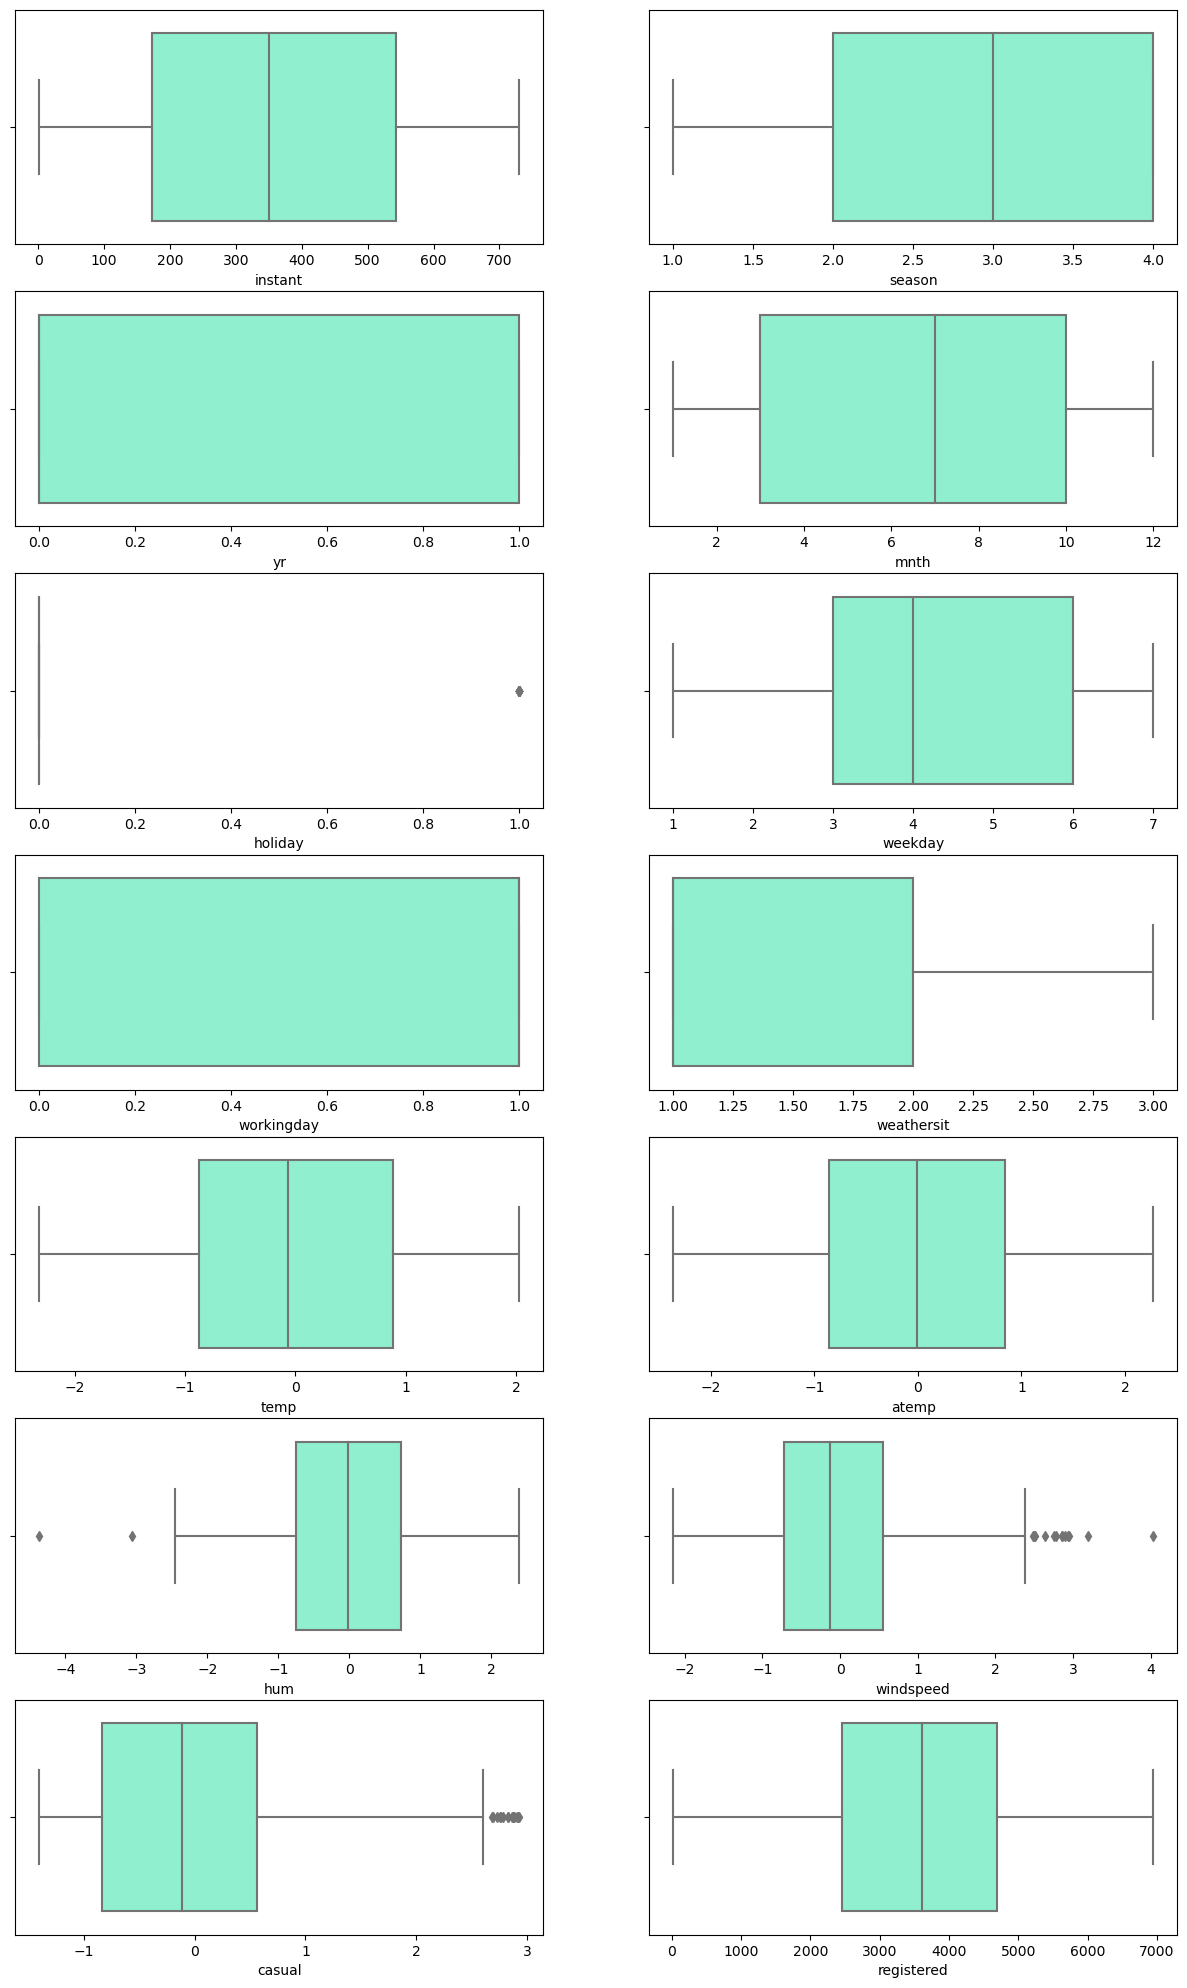

In [70]:
fig, axes = plt.subplots(7, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()

plt.show()

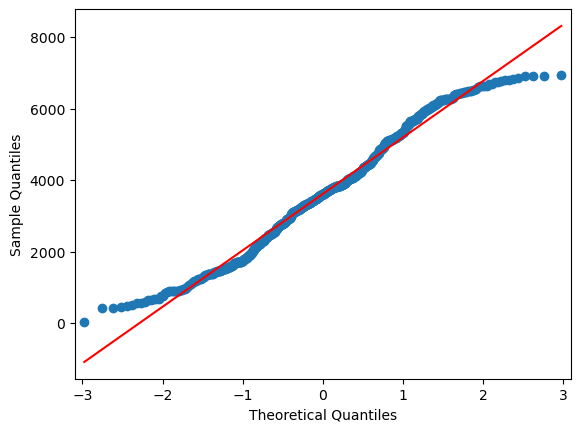

In [71]:
sm.qqplot(df['registered'], line= 's');

/home/cachito/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


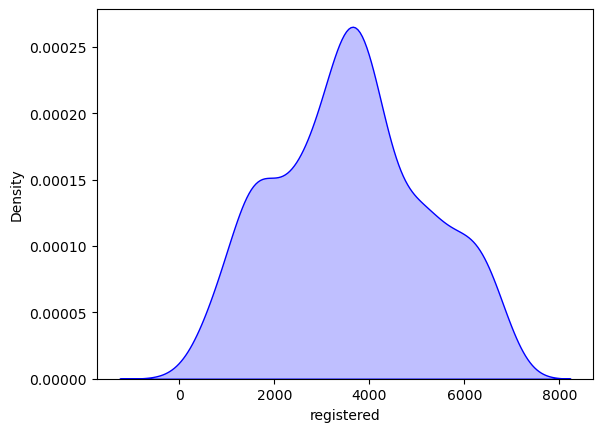

In [72]:
sns.distplot(
df['registered'], # variable respuesta
hist = False, 
color = "blue", 
kde_kws = {"shade": True, "linewidth": 1}); 

In [73]:
stats.shapiro(df["registered"])

ShapiroResult(statistic=0.9819141626358032, pvalue=1.713043360496158e-07)

### quiero separar los outliers de casual, a ver qué pasa...

In [74]:

def detectar_outliers(lista_columnas, dataframe):

    dicc_indices = {}

    for columna in lista_columnas:

        Q1 = np.nanpercentile(dataframe[columna],25)
        Q3 = np.nanpercentile(dataframe[columna],75)

        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outliers_data = dataframe[(dataframe[columna] < Q1 - outlier_step ) | (dataframe[columna] > Q3 + outlier_step )]

        if outliers_data.shape[0] > 0:

            dicc_indices[columna] = list(outliers_data.index)

    return outliers_data

In [75]:
outliers = detectar_outliers(["casual"], df)

In [76]:
outliers

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
140,141,1,0,5,0,1,1,1,0.622600,0.636883,-0.013636,-0.899758,2.928161,3547,0.783657
181,183,2,0,7,0,1,1,1,1.359681,1.217781,-1.280884,-0.970193,2.824477,2915,0.415591
275,281,3,0,10,1,1,0,1,0.184586,0.278844,0.504815,-1.859195,2.884000,3174,0.571187
434,442,4,1,3,0,2,1,2,-0.082722,-0.020738,1.261963,-0.819805,2.830237,3685,0.830335
451,463,1,1,4,0,2,1,1,0.066812,0.152192,-2.455576,0.527975,2.874399,2939,0.442418
469,484,1,1,4,0,2,1,1,-0.159474,-0.104768,-0.289216,-0.947349,2.872479,4075,1.051389
475,491,1,1,5,0,2,1,2,0.405578,0.483438,0.774827,-0.526643,2.691991,4224,1.080899
481,498,1,1,5,0,2,1,1,0.676856,0.717258,-0.365069,0.432793,2.763034,3946,0.951593
501,526,1,1,6,0,2,1,1,1.296163,1.194643,-0.628818,-0.732237,2.862879,4374,1.209131
542,574,2,1,7,0,1,1,1,1.454959,1.401671,-0.106888,-0.431461,2.882079,4451,1.255810


In [ ]:
ind["casual"]

[148,
 183,
 184,
 196,
 246,
 281,
 440,
 446,
 454,
 455,
 461,
 468,
 469,
 475,
 489,
 496,
 503,
 504,
 510,
 511,
 512,
 517,
 518,
 524,
 531,
 532,
 538,
 539,
 549,
 559,
 567,
 580,
 594,
 608,
 609,
 616,
 622,
 629,
 630,
 636,
 643,
 657,
 664,
 679]

''

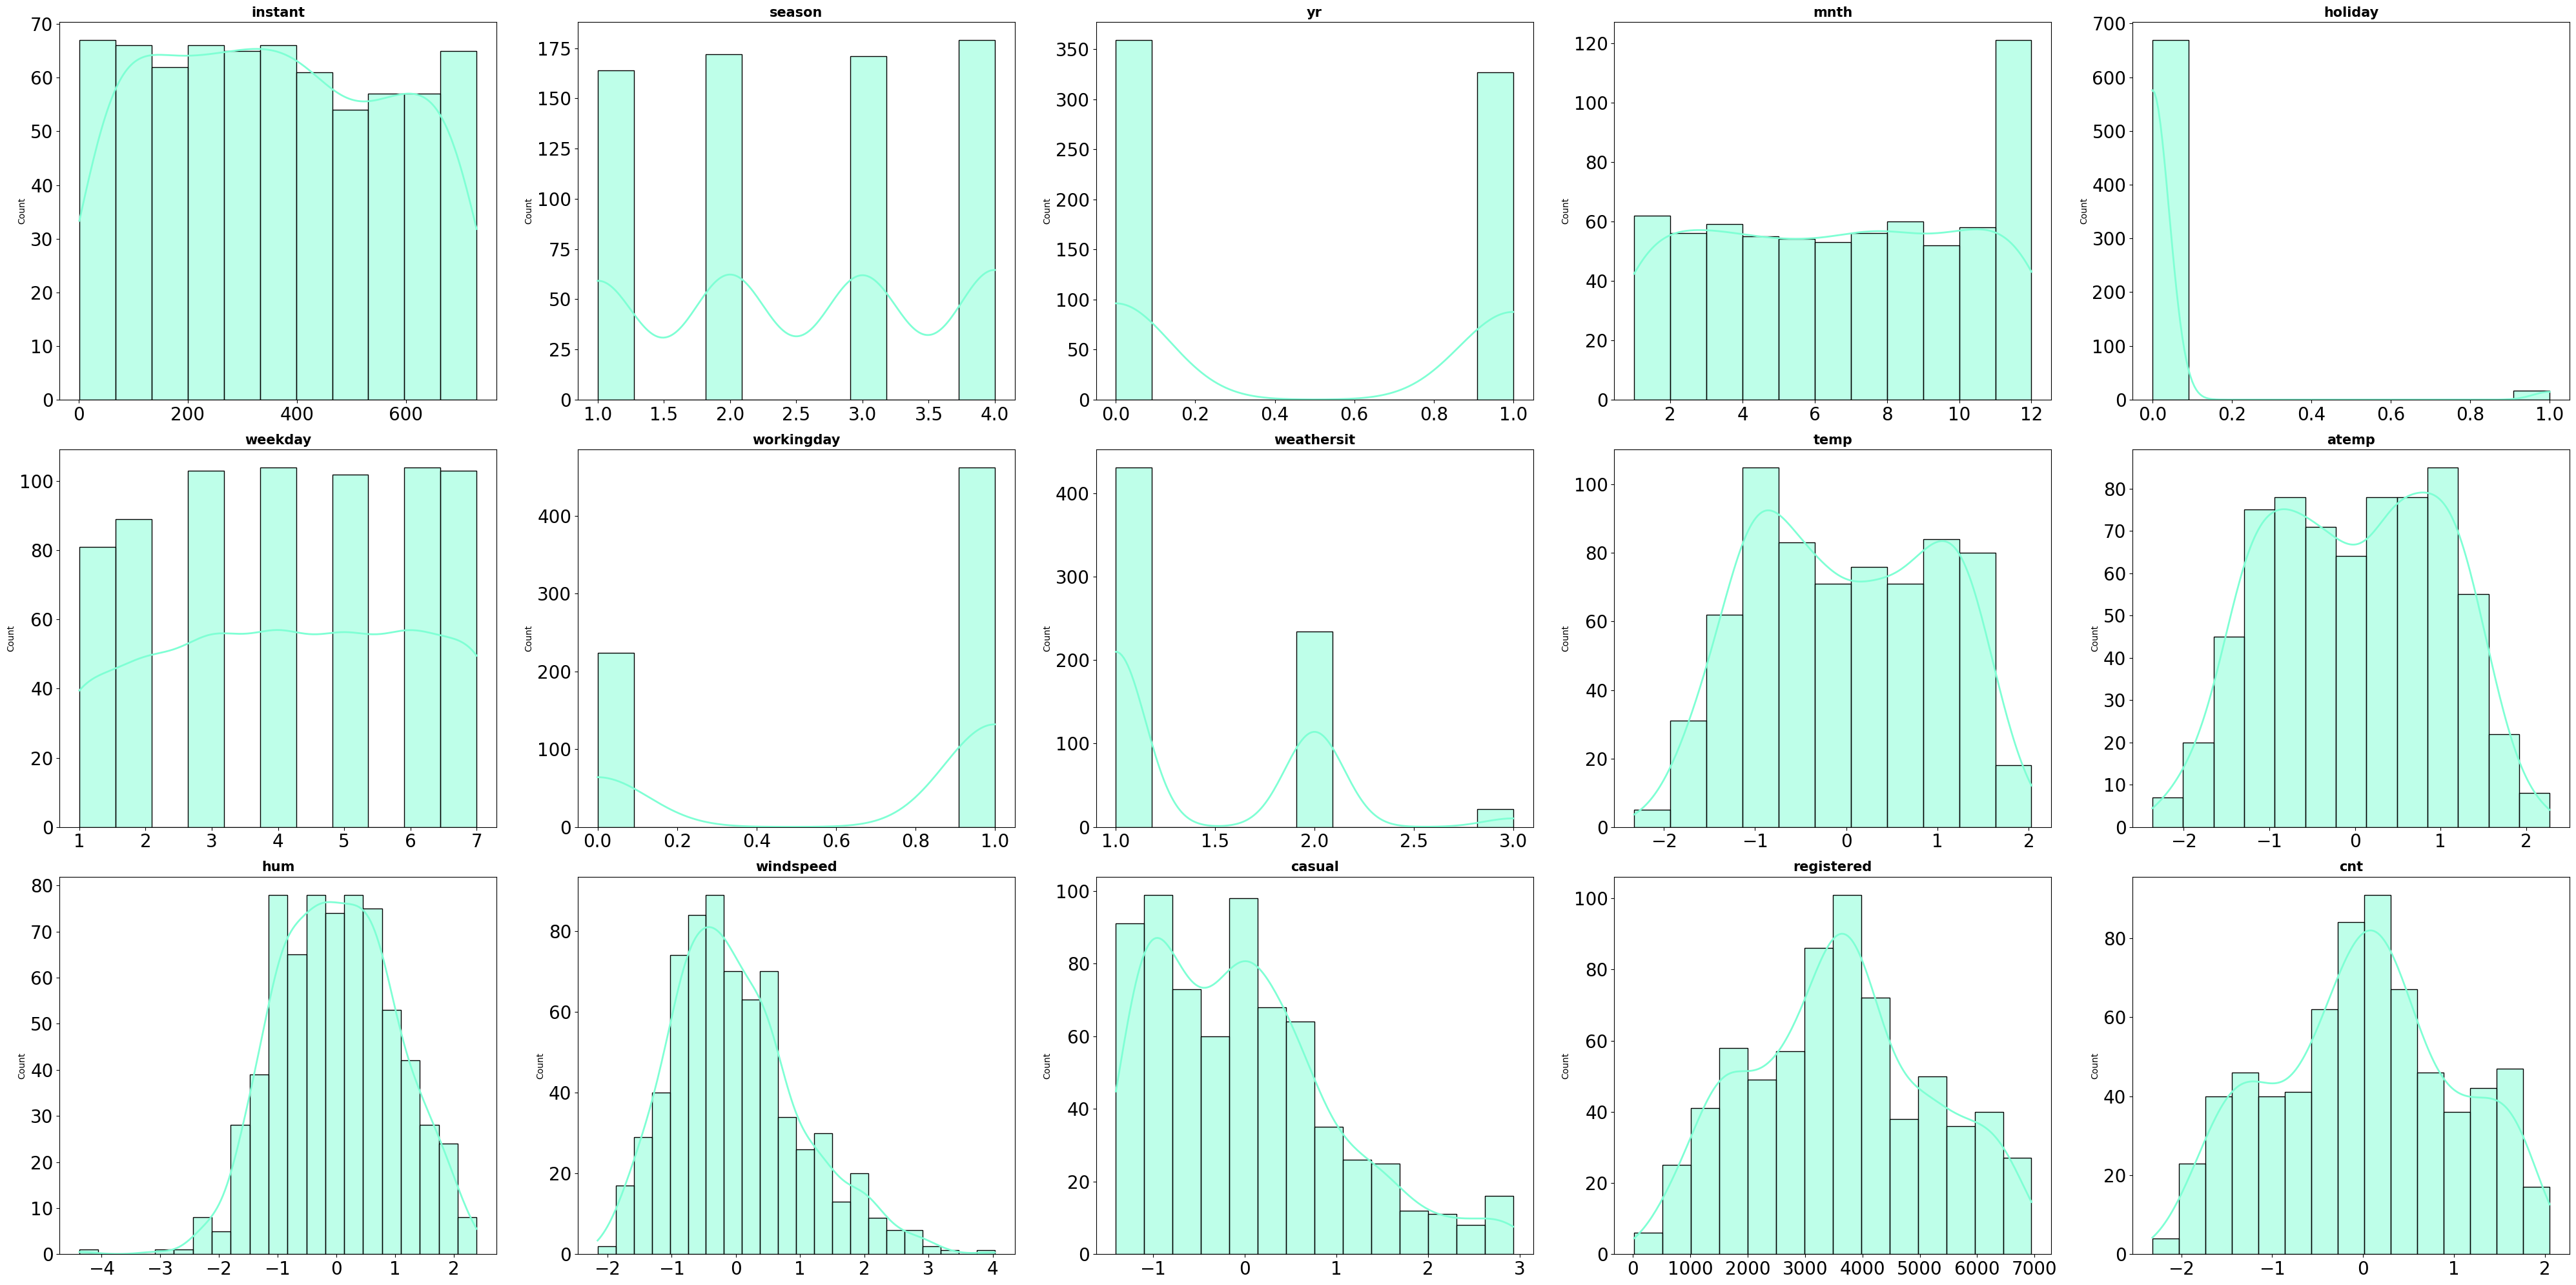

In [77]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (40, 20))


axes = axes.flat


for i, colum in enumerate(numericas): 
    sns.histplot(
    data = df,
    x = colum,
    kde = True, 
    color = "aquamarine", 
    line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
    alpha = 0.5, # para especificar la transparencia del color
    ax = axes[i])


    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
; 

In [81]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

### probamos modelos 


In [78]:
df = pd.read_csv("estandarizados.csv", index_col = 0)

In [141]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [79]:
# separar X e y

X = df.drop("registered", axis = 1)
y = df["registered"]

In [82]:
# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeRegressor(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [84]:
max_features = np.sqrt(len(x_train.columns))
max_features

3.7416573867739413

In [85]:
# max depth

print(arbol.tree_.max_depth)

17


In [86]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [87]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [88]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,151.413043,47802.891304,218.638723,0.983446,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I


overfitting, tenemos que reducir la profundidad del modelo

In [96]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [2,4, 6], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100],
        "random_state" :[0]} 

In [97]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [98]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'random_state': [0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [99]:
# este método nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 variables predictoras para construir el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=6, max_features=4, min_samples_leaf=10,
                      min_samples_split=10, random_state=0)

In [100]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [101]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II-")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,390.933708,305674.335871,552.878229,0.894148,test,Decision tree II
1,329.218467,213295.239886,461.838976,0.910867,train,Decision tree II


In [102]:
# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,151.413043,47802.891304,218.638723,0.983446,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,390.933708,305674.335871,552.878229,0.894148,test,Decision tree II
1,329.218467,213295.239886,461.838976,0.910867,train,Decision tree II


### vamos a modificar las columnas del df, para conseguir otros resultados. 

In [103]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,4,0,1,1,1,0,2,-0.778781,-0.632082,1.232734,-0.391485,-0.771840,654,-1.802458
1,2,4,0,1,0,2,1,2,-0.674240,-0.691755,0.469324,0.731665,-1.155857,670,-1.901181
2,3,4,0,1,0,3,1,1,-1.580704,-1.692801,-1.331685,0.729762,-1.176978,1229,-1.607158
3,4,4,0,1,0,4,1,1,-1.560855,-1.553969,-0.266251,-0.393388,-1.200019,1454,-1.492876
4,5,4,0,1,0,5,1,1,-1.413968,-1.450455,-1.333773,-0.054540,-1.249941,1518,-1.472487


In [104]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [108]:
# en df2 vamos a dejar sólo las columnas de atemp, hum, windspeed y casual
df2 = df.drop(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit','cnt'], axis = 1)

In [109]:
df2.head()

,temp,atemp,hum,windspeed,casual,registered
0,-0.778781,-0.632082,1.232734,-0.391485,-0.771840,654
1,-0.674240,-0.691755,0.469324,0.731665,-1.155857,670
2,-1.580704,-1.692801,-1.331685,0.729762,-1.176978,1229
3,-1.560855,-1.553969,-0.266251,-0.393388,-1.200019,1454
4,-1.413968,-1.450455,-1.333773,-0.054540,-1.249941,1518


In [110]:
# separar X e y

X = df2.drop("registered", axis = 1)
y = df2["registered"]

In [111]:
# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [112]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'random_state': [0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [113]:
# este método nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 variables predictoras para construir el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=4, max_features=3, min_samples_leaf=10,
                      min_samples_split=10, random_state=0)

In [114]:
y_pred_test_dt3 = mejor_modelo.predict(x_test)
y_pred_train_dt3 = mejor_modelo.predict(x_train)

In [117]:
dt_results3 = metricas(y_test, y_train, y_pred_test_dt3, y_pred_train_dt3, "Decision tree III")
dt_results3

,MAE,MSE,RMSE,R2,set,modelo
0,902.642997,1.413942e+06,1189.093111,0.510366,test,Decision tree III
1,788.099041,1.036769e+06,1018.218414,0.566752,train,Decision tree III


In [118]:
# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results = pd.concat([dt_results1, dt_results2, dt_results3], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,151.413043,4.780289e+04,218.638723,0.983446,test,Decission Tree I
1,0.000000,0.000000e+00,0.000000,1.000000,train,Decission Tree I
0,390.933708,3.056743e+05,552.878229,0.894148,test,Decision tree II
1,329.218467,2.132952e+05,461.838976,0.910867,train,Decision tree II
0,902.642997,1.413942e+06,1189.093111,0.510366,test,Decision tree III
1,788.099041,1.036769e+06,1018.218414,0.566752,train,Decision tree III


### vamos a cambiar de columnas. df3

In [119]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [132]:
df.sample(10)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
128,129,1,0,5,0,3,1,1,0.242811,0.351913,-0.277385,-0.193506,-0.132452,3698,0.009432
41,42,4,0,2,0,7,0,1,-1.620404,-1.545445,-0.850813,-1.053953,-1.121295,1597,-1.394153
557,590,2,1,8,0,3,1,1,1.264403,1.186118,-0.579409,-0.699875,0.910153,5676,1.362045
298,305,3,0,11,0,4,1,1,-0.471774,-0.428707,0.383727,-0.709393,-0.620153,3658,-0.148311
181,183,2,0,7,0,1,1,1,1.359681,1.217781,-1.280884,-0.970193,2.824477,2915,0.415591
407,414,4,1,2,1,1,0,1,-0.765548,-0.682013,-0.654567,-0.003141,1.347932,2883,-0.014176
501,526,1,1,6,0,2,1,1,1.296163,1.194643,-0.628818,-0.732237,2.862879,4374,1.209131
680,725,4,1,12,0,5,1,3,-1.325306,-1.504039,1.354518,1.599727,-1.390107,432,-2.094335
358,365,4,0,12,0,1,1,1,-0.421488,-0.323975,-0.089490,0.369973,-0.130532,1820,-0.997651
643,688,3,1,11,0,3,1,2,-0.580285,-0.559013,-0.037297,0.560337,-0.545270,5050,0.619476


In [120]:
# en df2 vamos a dejar sólo las columnas de season, workingday, cnt
df3 = df.drop(['instant',  'yr', 'mnth', 'holiday', 'weekday','temp', 'atemp', 'hum', 'windspeed', 'casual', 
       'weathersit'], axis = 1)

In [131]:
df3.head()

,season,workingday,registered,cnt
0,4,0,654,-1.802458
1,4,1,670,-1.901181
2,4,1,1229,-1.607158
3,4,1,1454,-1.492876
4,4,1,1518,-1.472487


In [122]:
# separar X e y

X = df3.drop("registered", axis = 1)
y = df3["registered"]

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [124]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'random_state': [0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [125]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=6, max_features=3, min_samples_leaf=10,
                      min_samples_split=10, random_state=0)

In [126]:
y_pred_test_dt4 = mejor_modelo.predict(x_test)
y_pred_train_dt4 = mejor_modelo.predict(x_train)

In [129]:
dt_results4 = metricas(y_test, y_train, y_pred_test_dt4, y_pred_train_dt4, "Decision tree IV")
dt_results4

,MAE,MSE,RMSE,R2,set,modelo
0,284.621185,141873.256779,376.660665,0.950871,test,Decision tree IV
1,256.077375,116220.917505,340.911891,0.951433,train,Decision tree IV


In [130]:
df_decision_results = pd.concat([dt_results1, dt_results2, dt_results3, dt_results4], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,151.413043,4.780289e+04,218.638723,0.983446,test,Decission Tree I
1,0.000000,0.000000e+00,0.000000,1.000000,train,Decission Tree I
0,390.933708,3.056743e+05,552.878229,0.894148,test,Decision tree II
1,329.218467,2.132952e+05,461.838976,0.910867,train,Decision tree II
0,902.642997,1.413942e+06,1189.093111,0.510366,test,Decision tree III
1,788.099041,1.036769e+06,1018.218414,0.566752,train,Decision tree III
0,284.621185,1.418733e+05,376.660665,0.950871,test,Decision tree IV
1,256.077375,1.162209e+05,340.911891,0.951433,train,Decision tree IV


### una más quitándole cnt... a ver qué pasa

In [201]:
# separar X e y

X = df3.drop(["registered", "cnt"], axis = 1)
y = df3["registered"]

In [202]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [203]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'random_state': [0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [204]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=4, max_features=2, min_samples_leaf=50,
                      min_samples_split=10, random_state=0)

In [205]:
y_pred_test_dt5 = mejor_modelo.predict(x_test)
y_pred_train_dt5 = mejor_modelo.predict(x_train)

In [206]:
dt_results5 = metricas(y_test, y_train, y_pred_test_dt5, y_pred_train_dt5, "Decision tree V")
dt_results5

,MAE,MSE,RMSE,R2,set,modelo
0,1153.062833,1.883196e+06,1372.295892,0.347868,test,Decision tree V
1,1110.231337,1.781690e+06,1334.799603,0.255461,train,Decision tree V


In [207]:
df_decision_results = pd.concat([dt_results1, dt_results2, dt_results3, dt_results4, dt_results5], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,151.413043,4.780289e+04,218.638723,0.983446,test,Decission Tree I
1,0.000000,0.000000e+00,0.000000,1.000000,train,Decission Tree I
0,390.933708,3.056743e+05,552.878229,0.894148,test,Decision tree II
1,329.218467,2.132952e+05,461.838976,0.910867,train,Decision tree II
0,902.642997,1.413942e+06,1189.093111,0.510366,test,Decision tree III
1,788.099041,1.036769e+06,1018.218414,0.566752,train,Decision tree III
0,284.621185,1.418733e+05,376.660665,0.950871,test,Decision tree IV
1,256.077375,1.162209e+05,340.911891,0.951433,train,Decision tree IV
0,1153.062833,1.883196e+06,1372.295892,0.347868,test,Decision tree V
1,1110.231337,1.781690e+06,1334.799603,0.255461,train,Decision tree V


### voy a probar a estandarizar registered, y predecir cnt

In [183]:
df4 = pd.read_csv("estandarizados_cnt.csv", index_col = 0)

In [142]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [184]:
df4 = df4.drop(['instant', 'yr', 'mnth', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual'
       ], axis =1)

registered = df4.drop(['season', 'workingday', 'cnt'], axis = 1)

In [185]:
df4.columns

Index(['season', 'workingday', 'registered', 'cnt'], dtype='object')

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [188]:
# ajustamos nuestros datos.  

scaler.fit(registered)

StandardScaler()

In [189]:
# transformamos los datos

X_escaladas = scaler.transform(registered)

In [190]:
# por último convertiremos el array que nos devuelve en un dataframe. 

registered_estandar = pd.DataFrame(X_escaladas, columns = registered.columns)
registered_estandar.head(2)

,registered
0,-1.873228
1,-1.863094


In [191]:
df4["registered"]=registered_estandar["registered"]

In [192]:
df4.head()

,season,workingday,registered,cnt
0,4,0,-1.873228,985
1,4,1,-1.863094,801
2,4,1,-1.509026,1349
3,4,1,-1.366512,1562
4,4,1,-1.325975,1600


### ahora que tengo los datos estandarizados menos el de cnt, voy a buscar un modelo de decision tree para la variable respuesta cnt. 

In [209]:
# separar X e y

X = df4.drop(["cnt"], axis = 1)
y = df4["cnt"]

In [210]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [195]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'random_state': [0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [196]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=6, max_features=3, min_samples_leaf=10,
                      min_samples_split=10, random_state=0)

In [199]:
y_pred_test_dt6 = mejor_modelo.predict(x_test)
y_pred_train_dt6 = mejor_modelo.predict(x_train)

In [200]:
dt_results6 = metricas(y_test, y_train, y_pred_test_dt6, y_pred_train_dt6, "Decision tree VI - VR:cnt")
dt_results6

,MAE,MSE,RMSE,R2,set,modelo
0,318.485784,196408.415369,443.179891,0.951136,test,Decision tree VI - VR:cnt
1,290.340515,151760.008074,389.563869,0.954511,train,Decision tree VI - VR:cnt


In [208]:
df_decision_results = pd.concat([dt_results1, dt_results2, dt_results3, dt_results4, dt_results5,], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,151.413043,4.780289e+04,218.638723,0.983446,test,Decission Tree I
1,0.000000,0.000000e+00,0.000000,1.000000,train,Decission Tree I
0,390.933708,3.056743e+05,552.878229,0.894148,test,Decision tree II
1,329.218467,2.132952e+05,461.838976,0.910867,train,Decision tree II
0,902.642997,1.413942e+06,1189.093111,0.510366,test,Decision tree III
1,788.099041,1.036769e+06,1018.218414,0.566752,train,Decision tree III
0,284.621185,1.418733e+05,376.660665,0.950871,test,Decision tree IV
1,256.077375,1.162209e+05,340.911891,0.951433,train,Decision tree IV
0,1153.062833,1.883196e+06,1372.295892,0.347868,test,Decision tree V
1,1110.231337,1.781690e+06,1334.799603,0.255461,train,Decision tree V


### son muy parecidas las métricas entre el mejor modelo con la VR: registered, y el mejor modelo con la VR: cnt. 
### Vamos a probar un random forest con este df y esta VR

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [212]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [213]:
# ajustamos el modelo que acabamos de definir en el GridSearch
# 🚨 Esta celda puede tardar en ejecutarse

gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'random_state': [0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [214]:
# al igual que el decision tree podemos sacar cual es nuestro mejor bosque
# En este caso,  nuestro mejor bosque es aquel que esta formado por arboles de 6 de profundidad, usa 4 variables y que tiene  un min_samples_leaf y un min_samples_split de 10. 

bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=6, max_features=3, min_samples_leaf=10,
                      min_samples_split=10, random_state=0)

In [215]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [216]:
dt_results_rf = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
dt_results_rf

,MAE,MSE,RMSE,R2,set,modelo
0,305.918438,185128.695726,430.265843,0.953942,test,Random Forest
1,289.131444,150646.726085,388.132356,0.954845,train,Random Forest


In [218]:
df_decision_results = pd.concat([dt_results1, dt_results2, dt_results3, dt_results4, dt_results5,dt_results6,dt_results_rf], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,151.413043,4.780289e+04,218.638723,0.983446,test,Decission Tree I
1,0.000000,0.000000e+00,0.000000,1.000000,train,Decission Tree I
0,390.933708,3.056743e+05,552.878229,0.894148,test,Decision tree II
1,329.218467,2.132952e+05,461.838976,0.910867,train,Decision tree II
0,902.642997,1.413942e+06,1189.093111,0.510366,test,Decision tree III
1,788.099041,1.036769e+06,1018.218414,0.566752,train,Decision tree III
0,284.621185,1.418733e+05,376.660665,0.950871,test,Decision tree IV
1,256.077375,1.162209e+05,340.911891,0.951433,train,Decision tree IV
0,1153.062833,1.883196e+06,1372.295892,0.347868,test,Decision tree V
1,1110.231337,1.781690e+06,1334.799603,0.255461,train,Decision tree V


In [219]:
# vamos a crearnos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,registered,0.989822
0,season,0.009261
1,workingday,0.000917


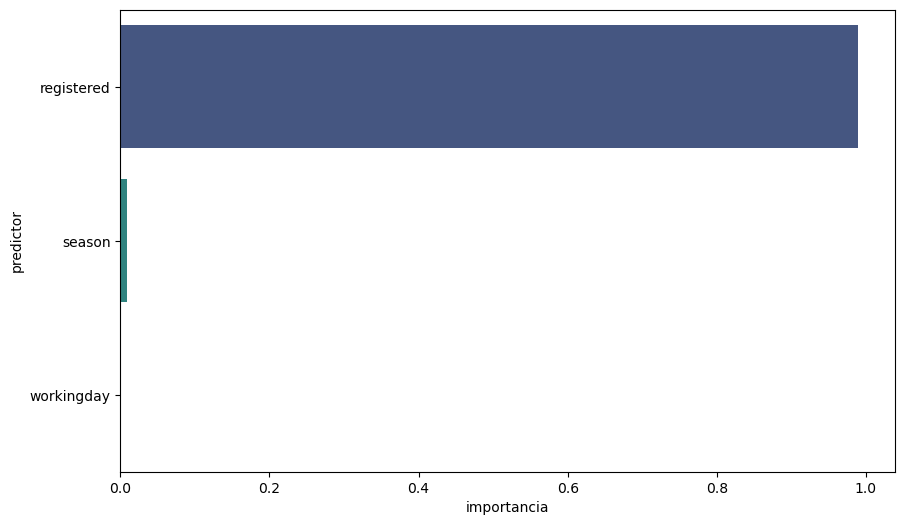

In [220]:

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()